# Creation of the dataframe

In [31]:
# this code is to delete the first three block in a json file that says " user yyy join the channel"

import os
import json

main_folder_path = '/Users/alejandroospina/Desktop/1. USI/4. IV SEMESTER/1. Thesis/ConversationalThesis/SplitOfConversationbyTopic/textAnalysisByTopic/'

for subdir, _, files in os.walk(main_folder_path):
    for file in files:
        if file.endswith('.json'):
            file_path = os.path.join(subdir, file)
            with open(file_path, 'r') as f:
                data = json.load(f)
            new_data = [msg for msg in data if not ('type' in msg and msg['type'] == 'message' and 'subtype' in msg and msg['subtype'] == 'channel_join')]
            with open(file_path, 'w') as f:
                json.dump(new_data, f, indent=4)


In [43]:
import os
import json
import pandas as pd

# Set the path to the main folder containing all the topic directories
main_folder_path = '/Users/alejandroospina/Desktop/1. USI/4. IV SEMESTER/1. Thesis/ConversationalThesis/SplitOfConversationbyTopic/textAnalysisByTopic/'

# Initialize an empty list to store the data for each topic
all_topic_data = []

# Iterate over all the topic directories
for topic_dir in os.listdir(main_folder_path):
    # Check if the current directory is a folder (not a file)
    if os.path.isdir(os.path.join(main_folder_path, topic_dir)):
        # Iterate over all the JSON files in the current topic directory
        for filename in os.listdir(os.path.join(main_folder_path, topic_dir)):
            if filename.endswith('.json'):
                # Load the JSON file
                with open(os.path.join(main_folder_path, topic_dir, filename), 'r') as f:
                    data = json.load(f)
                
                # Extract the information needed for the DataFrame
                user_id = filename.split('_')[0]
                topic_id = topic_dir[:min(15, len(topic_dir))]
                queries = []
                answers = []
                i = 0
                while i < len(data):
                    message = data[i]
                    if message['user'] == 'U04RH7PFJ6Q' or message['user'] == 'U04Q81LB5SL':
                        if "se ha unido al canal" not in message['text']:
                            queries.append(message['text'])
                        i += 1
                        if i < len(data):
                            message = data[i]
                            if message['user'] == 'U04PWT3LZG9':
                                answers.append(message['text'])
                                i += 1
                            else:
                                answers.append(None)
                        else:
                            answers.append(None)
                    else:
                        i += 1
                        queries.append(None)
                        answers.append(None)

                # Pad the lists with None values if needed
                num_queries = len(queries)
                num_answers = len(answers)
                if num_queries < 11:
                    queries += [None] * (11 - num_queries)
                if num_answers < 11:
                    answers += [None] * (11 - num_answers)

                # Interleave the queries and answers
                topic_data = [user_id, topic_id]
                for i in range(11):
                    topic_data += [queries[i], answers[i]]

                all_topic_data.append(topic_data)

# Create the DataFrame
header = ["UserID", "TopicID", "Query1", "Answer1", "Query2", "Answer2", "Query3", "Answer3", "Query4", "Answer4", "Query5", "Answer5", "Query6", "Answer6", "Query7", "Answer7", "Query8", "Answer8", "Query9", "Answer9", "Query10", "Answer10", "Query11", "Answer11"]
df = pd.DataFrame(all_topic_data, columns=header)

# Print the DataFrame
print(df)




   UserID  TopicID                                             Query1  \
0   bot17  running  &gt; I took a year-long break from running due...   
1   bot22  running  Well, I am planning to get back to running (jo...   
2   bot23  running           tips to restart running after long break   
3   bot10  running  Hi bot! I need an advice on going back to run!...   
4   bot24  running  You took a year-long break from running due to...   
5   bot21  running  &gt; I took a year-long break from running due...   
6   bot20  running  &gt; You took a year-long break from running d...   
7   bot11  running  I took a year-long break from running because ...   
8   bot14  running  You took a year-long break from running due to...   
9   bot17  nigeria  Can you tell me some interesting information a...   
10  bot10  nigeria  My friend wanted to make a trip to Nigeria, bu...   
11  bot16  nigeria  My friend asked for something interesting info...   
12  bot18  nigeria  My friend will travel to Nigeri

In [44]:
#deleting the "" of some sentences and also the string &gt; that was at the beginning of some sentences

import pandas as pd

df["Query1"] = df["Query1"].str.replace(r'^"|"$', '', regex=True)  # remove double quotes from beginning and end of strings
df["Query1"] = df["Query1"].str.replace(r'^(>|&gt;)\s*', '', regex=True)  # remove "> " or "&gt; " from beginning of strings

# Save the DataFrame to a CSV file
df.to_csv('dataframeNew.csv', index=False)

# Text Analysis

For the TopicID "phone" and the Query1, the similar score is 0.80254
For the TopicID "phone" and the Query2, the similar score is 0.77884
For the TopicID "phone" and the Query3, the similar score is 0.63875
For the TopicID "phone" and the Query4, the similar score is 0.75769
For the TopicID "phone" and the Query5, the similar score is 0.63842
For the TopicID "phone" and the Query6, the similar score is 0.70963
For the TopicID "phone" and the Query7, the similar score is 0.67847
For the TopicID "phone" and the Query8, the similar score is 0.69720
For the TopicID "phone" and the Query9, the similar score is 0.00000
For the TopicID "phone" and the Query10, the similar score is 0.00000
For the TopicID "phone" and the Query11, the similar score is 0.00000


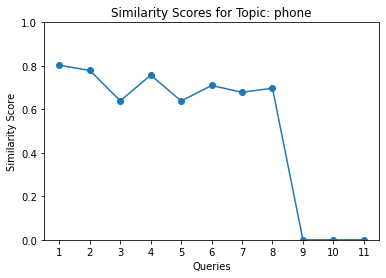

For the TopicID "nigeria" and the Query1, the similar score is 0.73491
For the TopicID "nigeria" and the Query2, the similar score is 0.55966
For the TopicID "nigeria" and the Query3, the similar score is 0.64971
For the TopicID "nigeria" and the Query4, the similar score is 0.62151
For the TopicID "nigeria" and the Query5, the similar score is 0.54399
For the TopicID "nigeria" and the Query6, the similar score is 0.53516
For the TopicID "nigeria" and the Query7, the similar score is 0.49515
For the TopicID "nigeria" and the Query8, the similar score is 0.43193
For the TopicID "nigeria" and the Query9, the similar score is 0.00000
For the TopicID "nigeria" and the Query10, the similar score is 0.00000
For the TopicID "nigeria" and the Query11, the similar score is 0.00000


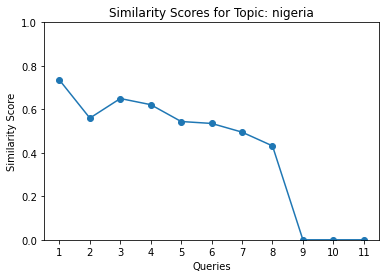

For the TopicID "son" and the Query1, the similar score is 0.97998
For the TopicID "son" and the Query2, the similar score is 0.79077
For the TopicID "son" and the Query3, the similar score is 0.79308
For the TopicID "son" and the Query4, the similar score is 0.83835
For the TopicID "son" and the Query5, the similar score is 0.61373
For the TopicID "son" and the Query6, the similar score is 0.63661
For the TopicID "son" and the Query7, the similar score is 0.00000
For the TopicID "son" and the Query8, the similar score is 0.00000
For the TopicID "son" and the Query9, the similar score is 0.00000
For the TopicID "son" and the Query10, the similar score is 0.00000
For the TopicID "son" and the Query11, the similar score is 0.00000


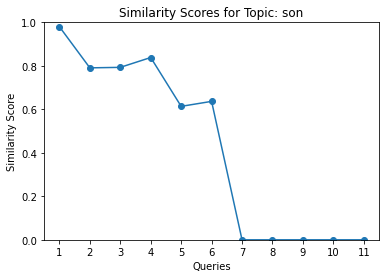

For the TopicID "running" and the Query1, the similar score is 0.88735
For the TopicID "running" and the Query2, the similar score is 0.74835
For the TopicID "running" and the Query3, the similar score is 0.74379
For the TopicID "running" and the Query4, the similar score is 0.72649
For the TopicID "running" and the Query5, the similar score is 0.69234
For the TopicID "running" and the Query6, the similar score is 0.58226
For the TopicID "running" and the Query7, the similar score is 0.60119
For the TopicID "running" and the Query8, the similar score is 0.65403
For the TopicID "running" and the Query9, the similar score is 0.00000
For the TopicID "running" and the Query10, the similar score is 0.00000
For the TopicID "running" and the Query11, the similar score is 0.00000


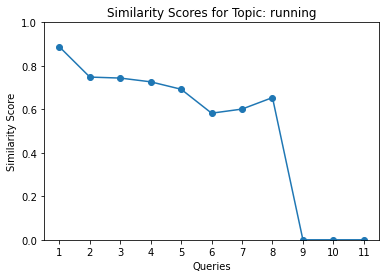

In [19]:
import pandas as pd
import spacy
from itertools import combinations
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataframeNew.csv', index_col=0)

# Define the spacy model
nlp = spacy.load("en_core_web_md")

# Define the topics to plot
topics = ["phone", "nigeria", "son", "running"]

# Loop over the topics
for topic in topics:
    # Filter the data for the current topic
    topic_df = df[df["TopicID"] == topic]
    
    # Loop over the queries
    similarity_scores = []
    for i in range(1, 12):
        # Get the sentences for the current query
        sentences = topic_df[f"Query{i}"].dropna().tolist()
        
        # Calculate the similarity scores between all sentence pairs
        scores = []
        for s1, s2 in combinations(sentences, 2):
            doc1 = nlp(s1)
            doc2 = nlp(s2)
            scores.append(doc1.similarity(doc2))
        
        # Calculate the average similarity score for the current query
        avg_sim = sum(scores) / len(scores) if scores else 0
        similarity_scores.append(avg_sim)
        
        # Print the similarity score for the current query
        print(f"For the TopicID \"{topic}\" and the Query{i}, the similar score is {avg_sim:.5f}")
    
    # Plot the similarity scores for the current topic
    plt.plot(similarity_scores, marker='o')
    plt.ylim(0, 1)
    plt.xticks(range(11), [f"{i}" for i in range(1, 12)])
    plt.title(f"Similarity Scores for Topic: {topic}")
    plt.xlabel("Queries")
    plt.ylabel("Similarity Score")
    plt.show()


# Word Frecuency Analysis

In [21]:
import pandas as pd
from collections import Counter
import spacy

# Load the dataset
df = pd.read_csv('dataframeNew.csv', index_col=0)

# Define the spacy model
nlp = spacy.load("en_core_web_sm")

# Define the topics to analyze
topics = ["phone", "nigeria", "son", "running"]

# Loop over the topics
for topic in topics:
    # Filter the data for the current topic
    topic_df = df[df["TopicID"] == topic]
    
    # Loop over the queries
    for i in range(1, 12):
        # Get the sentences for the current query
        sentences = topic_df[f"Query{i}"].dropna().tolist()

        # Combine the sentences into a single string
        text = " ".join(sentences)

        # Tokenize the text
        doc = nlp(text)

        # Count the word frequencies
        word_freq = Counter([token.text for token in doc if token.is_alpha and not token.is_stop])

        # Print the 10 most common words
        print(f"\nTopic: {topic}, Query{i}")
        for word, freq in word_freq.most_common(10):
            print(f"{word}: {freq}")



Topic: phone, Query1
phone: 8
buying: 8
consider: 5
Imagine: 4
interested: 4
things: 4
new: 3
buy: 2
Hi: 2
help: 2

Topic: phone, Query2
phone: 6
looking: 3
new: 2
Android: 2
battery: 2
life: 2
storage: 2
good: 2
camera: 2
big: 2

Topic: phone, Query3
phone: 3
screen: 2
prefer: 2
awesome: 1
thanks: 1
info: 1
little: 1
cousin: 1
expert: 1
think: 1

Topic: phone, Query4
time: 2
know: 2
phones: 2
phone: 2
price: 2
iPhone: 2
calls: 2
specific: 1
apps: 1
limiting: 1

Topic: phone, Query5
phone: 3
Good: 2
Pro: 2
probably: 1
use: 1
options: 1
largest: 1
display: 1
prettier: 1
design: 1

Topic: phone, Query6
phones: 2
additional: 1
features: 1
consider: 1
quests: 1
phone: 1
suggest: 1
Great: 1
like: 1
winner: 1

Topic: phone, Query7
change: 2
topic: 2
fast: 2
Finally: 1
best: 1
phones: 1
regardless: 1
price: 1
range: 1
operating: 1

Topic: phone, Query8
charge: 2
cable: 2
Thank: 1
satisfied: 1
questions: 1
phones: 1
display: 1
important: 1
intended: 1
usage: 1

Topic: phone, Query9
Ok: 1
offe

This code loops over each topic and query, combines the sentences for each query into a single string, tokenizes the text using spaCy, counts the word frequencies, and prints the 10 most common words for each query. 
